In [26]:
#Graphs to vizulise the accruacy of each dtw module in global comparison not window
#modules to make graphs
library("ggplot2")
library("stats")
library("dplyr")





,Module,AvgTime,SD,Test
1,cdtw,13010.7272727273,4884.18625957097,Global
2,dtw,607992.545454545,299389.699178968,Global
3,ftw,448633.818181818,50914.7399439851,Global
4,mlpy,28241.4545454545,200.587319457818,Global
5,mlpy_sub,24620.0909090909,102.591865706258,Global
6,pydtw,34034.1818181818,455.669796712887,Global
7,ucr,500713.363636364,276054.551307263,Global


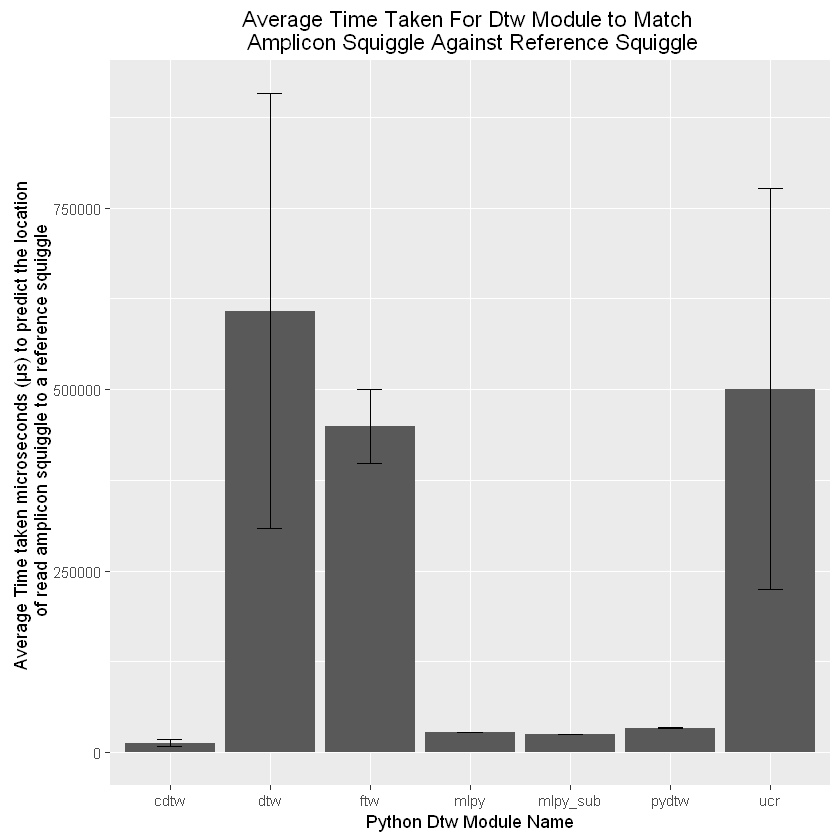

In [27]:
#load log file with time accuracy measuments of different dtw modules with global searching

all_time_accuracy= read.csv("./dtw_logs/bench_logallnew.txt", header = TRUE, sep=",",stringsAsFactors=FALSE)
#overall accuracy plot

#count how many were correct and not correct for each
accuracy = data.frame(table(all_time_accuracy$Module, all_time_accuracy$CorrectlyPredicted ))

#avg time taken for each module to match amplicpns 1-11
avgtime_all = group_by(all_time_accuracy, Module) %>% summarize(AvgTime = sum(Time)/11, SD = sd(Time))
#add label for later overall plot
avgtime_all["Test"] = "Global"
avgtime_all

#plot of times 
Fig1<-ggplot(data=avgtime_all,aes(x=Module, y=AvgTime)) + 
geom_bar(stat="identity") +
geom_errorbar(aes(ymin=AvgTime-SD, ymax=AvgTime+SD), position=position_dodge(width=0.9), width=0.25) +
labs(y="Average Time taken microseconds (μs) to predict the location \n of read amplicon squiggle to a reference squiggle",x="Python Dtw Module Name",title = "Average Time Taken For Dtw Module to Match \n Amplicon Squiggle Against Reference Squiggle") 

Fig1



,Algorithm,AvgTime,SD
1,cdtw,28130.0909090909,341.534611582913
2,dtw,37272488.3636364,143124.87550756
3,ftw,6568354.45454545,20186.4449290292
4,mlpy,50985.7272727273,165.095179159836
5,mlpy_sub,43912.2727272727,172.489472669546
6,ucr,1209088.90909091,40595.9507671752


,Algorithm,AvgTime,SD,Test
1,cdtw,28130.0909090909,341.534611582913,window
2,dtw,37272488.3636364,143124.87550756,window
3,ftw,6568354.45454545,20186.4449290292,window
4,mlpy,50985.7272727273,165.095179159836,window
5,mlpy_sub,43912.2727272727,172.489472669546,window
6,ucr,1209088.90909091,40595.9507671752,window


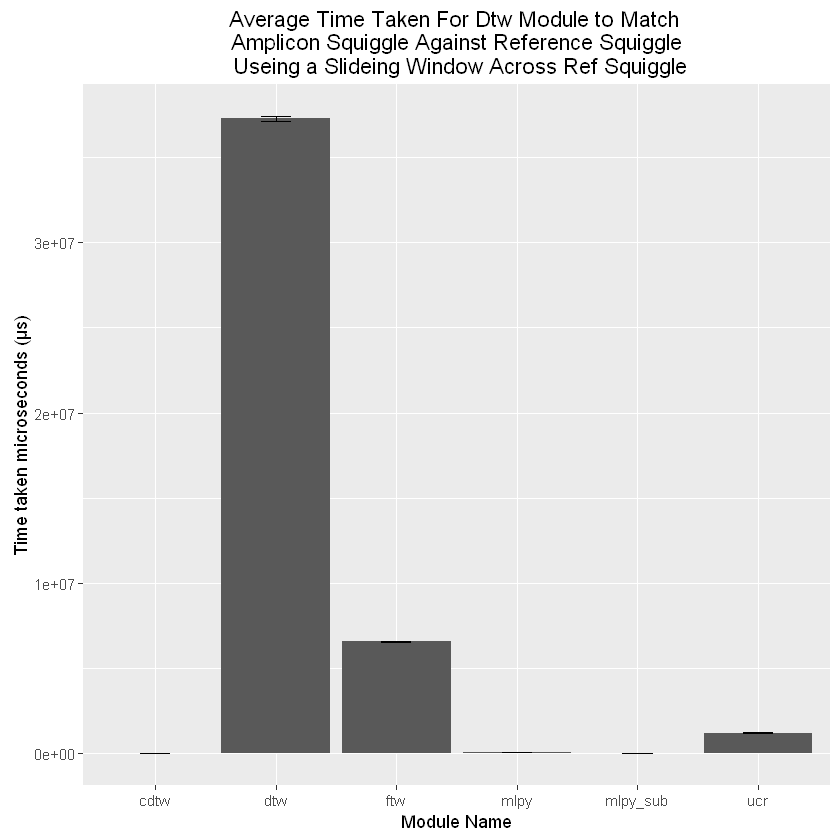

In [34]:
#load log with time measuments of different dtw modules with window searching
window_total_times = read.csv("./dtw_logs/Algorithm_Time.txt", header = TRUE, sep=",", stringsAsFactors=FALSE)
#avg time taken for each module to match amplicpns 1-11
avgtime_window = group_by(window_total_times, Algorithm) %>% summarize(
    "AvgTime" = (Amp1+Amp2+Amp3+Amp4+Amp5+
                 Amp6+Amp7+Amp8+Amp9+Amp10+
                 Amp11)/11, SD = sd(c(Amp1,Amp2,Amp3,Amp4,Amp5,Amp6,Amp7,Amp8,Amp9,Amp10,Amp11)))
avgtime_window
#add for later overview
avgtime_window["Test"] = "window"
avgtime_window

colnames(avgtime_window) <- c("Module", "AvgTime","SD", "Test")

#plot of times 
Fig2<-ggplot(data=avgtime_window,aes(x=Module, y=AvgTime)) + 
geom_bar(stat="identity") +
geom_errorbar(aes(ymin=AvgTime-SD, ymax=AvgTime+SD), position=position_dodge(width=0.9), width=0.25) +
labs(y="Time taken microseconds (μs)",x="Module Name",title = "Average Time Taken For Dtw Module to Match \n Amplicon Squiggle Against Reference Squiggle \n Useing a Slideing Window Across Ref Squiggle") 
Fig2



,module,correct
1,ucr,11
2,ftw,3
3,cdtw,2
4,mlpy,5
5,dtw,7
6,mlpy_sub,11


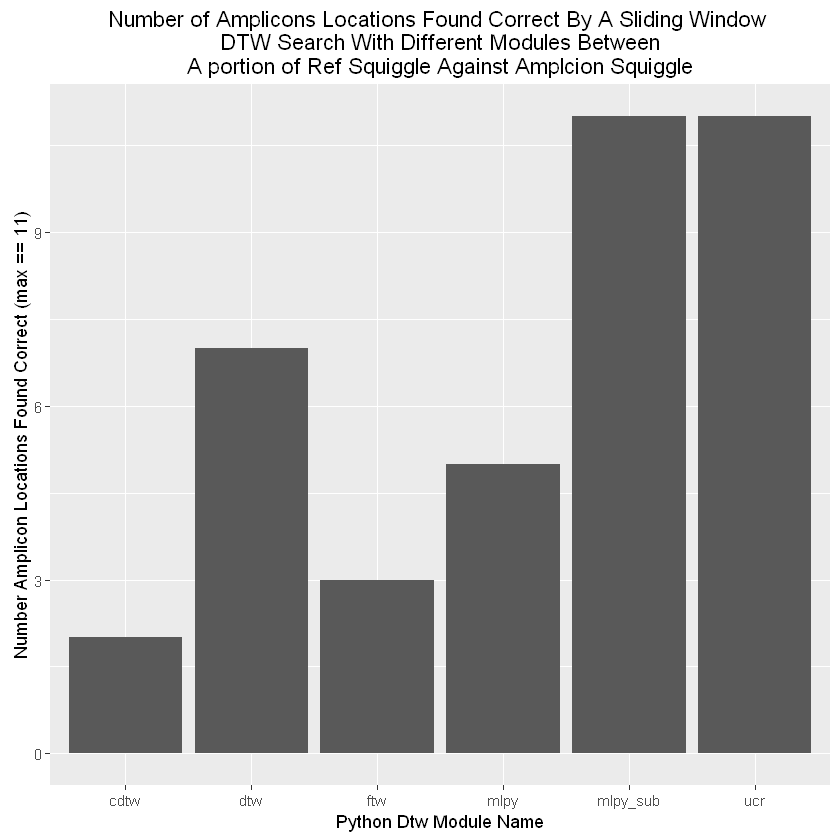

In [7]:
#count how many were correct and not correct for each

accuracy = read.csv("./dtw_logs/Algorithm_Accuracy.txt", header = TRUE, sep=",", stringsAsFactors=FALSE)

module = c("ucr", "ftw", "cdtw","mlpy","dtw","mlpy_sub")
correct = c(11,3,2,5,7,11)
accuracy_manual = data.frame(module, correct,stringsAsFactors=FALSE)
accuracy_manual

Fig3<-ggplot(data=accuracy_manual,aes(x=module, y=correct)) + 
geom_bar(stat="identity") +
labs(y="Number Amplicon Locations Found Correct (max == 11)",x="Python Dtw Module Name",title = "Number of Amplicons Locations Found Correct By A Sliding Window \n DTW Search With Different Modules Between \n A portion of Ref Squiggle Against Amplcion Squiggle ") 

Fig3

,Module,AvgTime,SD,Test
1,cdtw,28130.0909090909,341.534611582913,window
2,dtw,37272488.3636364,143124.87550756,window
3,ftw,6568354.45454545,20186.4449290292,window
4,mlpy,50985.7272727273,165.095179159836,window
5,mlpy_sub,43912.2727272727,172.489472669546,window
6,ucr,1209088.90909091,40595.9507671752,window
7,cdtw,13010.7272727273,4884.18625957097,Global
8,dtw,607992.545454545,299389.699178968,Global
9,ftw,448633.818181818,50914.7399439851,Global
10,mlpy,28241.4545454545,200.587319457818,Global


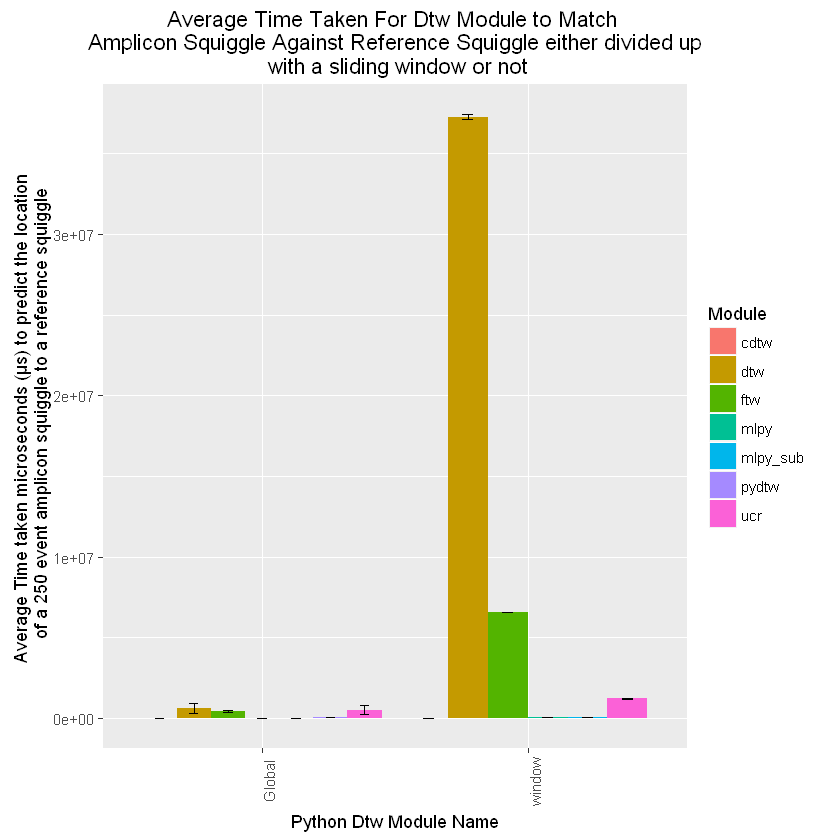

In [36]:
#overall grouped bare plots to compare the two tests
#combind data frames
newtime = rbind(avgtime_window,avgtime_all)
newtime

ggplot(newtime,aes(Test,AvgTime, fill=Module)) + 
geom_bar(stat= "identity", position= "dodge") +
geom_errorbar(aes(ymin=AvgTime-SD, ymax=AvgTime+SD), position=position_dodge(width=0.9), width=0.25) +
theme(axis.text.x=element_text(angle=90))+
labs(y="Average Time taken microseconds (μs) to predict the location \n of a 250 event amplicon squiggle to a reference squiggle",x="Python Dtw Module Name",
     title = "Average Time Taken For Dtw Module to Match \n Amplicon Squiggle Against Reference Squiggle either divided up \n with a sliding window or not") 

